# Using Sea Surface Temperature and Sea Surface Height Data for Hurricane Helene

#### Author: Julie Sanchez, NASA PO.DAAC

## Summary:
Here we show how to plot sea surface temperature (SST) and sea surface height (SSH) data for Hurricane Helene in September 2024. The data used in this tutorial were downloaded via Earthdata Search (https://search.earthdata.nasa.gov/) on a local machine. You will need to create an account in order to download the data. See [this tutorial](https://podaac.github.io/tutorials/external/earthdata_search.html) on how to use Earthdata Search.

### Learning Objective:

- Use python to plot the SST and SSH in the Gulf of Mexico to show how Hurricane Helene impacted the region.

## Datasets:

#### NASA Sea Surface Temperature data, MUR [https://podaac.jpl.nasa.gov/MEaSUREs-MUR](https://podaac.jpl.nasa.gov/MEaSUREs-MUR) 
#### NASA Sea Surface Height data [https://podaac.jpl.nasa.gov/NASA-SSH](https://podaac.jpl.nasa.gov/NASA-SSH)

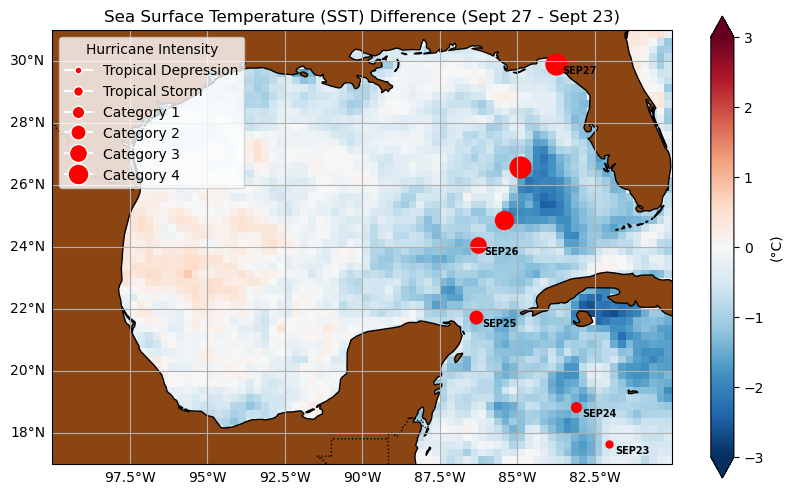

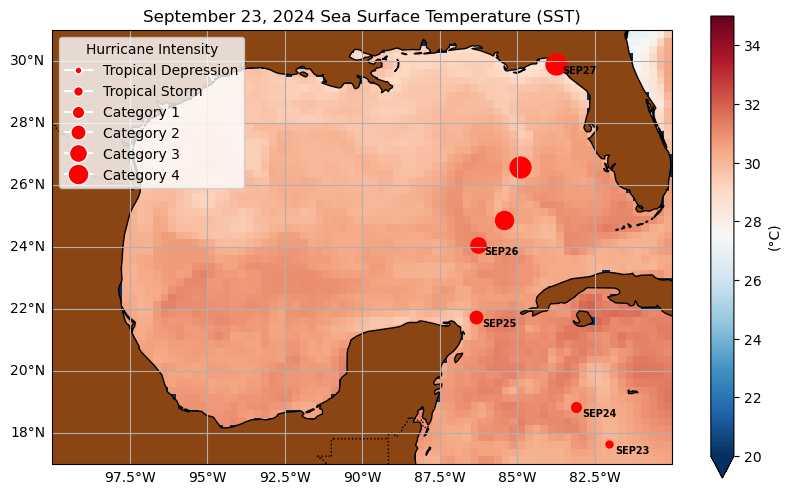

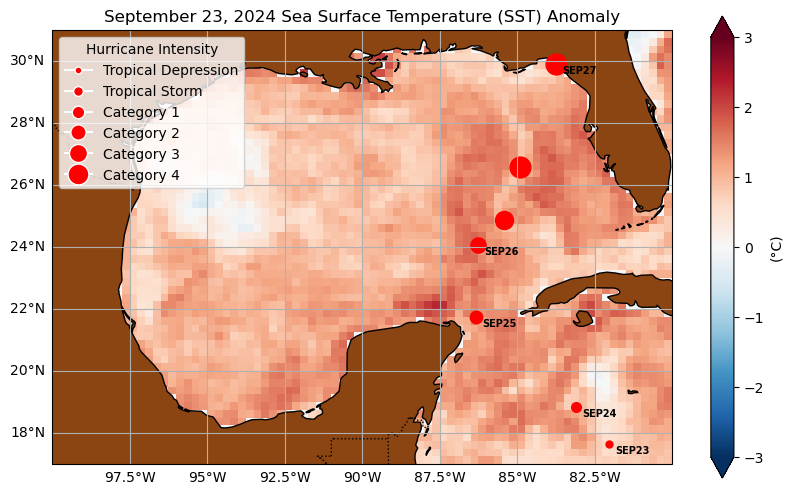

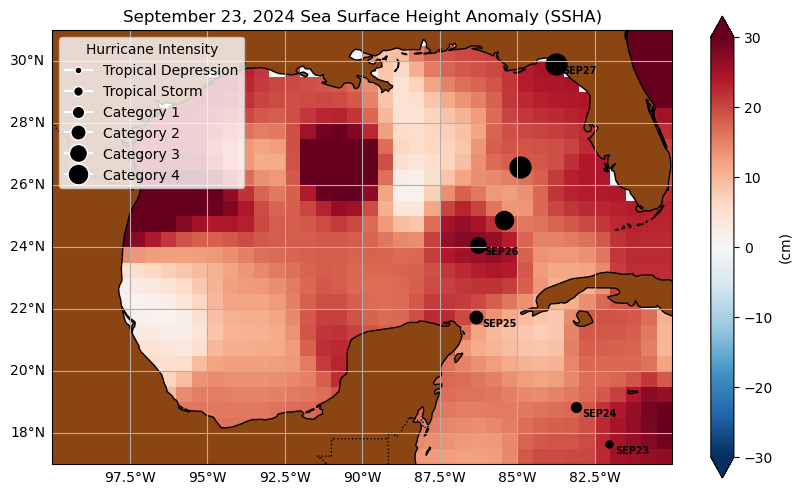

In [4]:
#Import needed packages 
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Common function to plot SST, anomalies, SSHA, or differences along with hurricane tracks
def plot_with_tracks(data, title, vmin=None, vmax=None, cmap='RdBu_r', extent=[-100, -80, 17, 31], land_color='#8B4513', marker_color='red', cbar_label='(°C)'):
    # Check if the data contains valid numeric values
    if data.isnull().all():
        print(f"Warning: The data for {title} contains only NaN or missing values.")
        return

    # Plot the data if it contains valid numeric entries
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set custom zoom extent
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Add a filled land feature with darker brown color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m', facecolor=land_color)
    ax.add_feature(land)

    # Plot the data
    data = data.fillna(0)  # Fill NaN values with 0 or other reasonable value
    plot = data.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=cmap, 
                     cbar_kwargs={'label': cbar_label})  # Unit on the colorbar

    # Add coastlines, gridlines, and labels
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    
    # Customize gridlines 
    gl = ax.gridlines(draw_labels=True)
    gl.right_labels = False  # No latitude labels on the right side
    gl.top_labels = False  # No top labels

    # Add country borders and region outlines
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

    # Hurricane Helene track data
    hurricane_data = [
        ('SEP23', 25.0, 17.64, -82.02, 'Tropical Depression', 5),
        ('SEP24', 34.0, 18.84, -83.11, 'Tropical Storm', 7),
        ('SEP25', 65.0, 21.73, -86.33, 'Category 1', 9),
        ('SEP26', 82.2, 24.06, -86.27, 'Category 2', 11),
        ('SEP26', 99.6, 24.86, -85.43, 'Category 3', 13),
        ('SEP26', 115.0, 26.59, -84.89, 'Category 4', 15),
        ('SEP27', 137.4, 29.89, -83.73, 'Category 4', 15),
    ]

    # Plot hurricane track markers
    for i, (day, knts, lat, lon, category, marker_size) in enumerate(hurricane_data):
        ax.plot(lon, lat, marker='o', markersize=marker_size, color=marker_color, transform=ccrs.PlateCarree())
        
        # Only add the day label when it changes to avoid repetition
        if i == 0 or hurricane_data[i-1][0] != day:
            ax.text(lon + 0.2, lat - 0.3, day, transform=ccrs.PlateCarree(), fontsize=7, fontweight='bold', color='black')

    # Ensure the legend marker sizes match the track marker sizes
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Tropical Depression', markerfacecolor=marker_color, markersize=5),
        Line2D([0], [0], marker='o', color='w', label='Tropical Storm', markerfacecolor=marker_color, markersize=7),
        Line2D([0], [0], marker='o', color='w', label='Category 1', markerfacecolor=marker_color, markersize=9),
        Line2D([0], [0], marker='o', color='w', label='Category 2', markerfacecolor=marker_color, markersize=11),
        Line2D([0], [0], marker='o', color='w', label='Category 3', markerfacecolor=marker_color, markersize=13),
        Line2D([0], [0], marker='o', color='w', label='Category 4', markerfacecolor=marker_color, markersize=15),
    ]
    ax.legend(handles=legend_elements, loc='upper left', title="Hurricane Intensity", frameon=True)

    # Add map title
    plt.title(title)

    # Show the plot
    plt.show()

# Load datasets for different dates
file_path_sept_23 = '/Users/20240923090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc'
file_path_sept_27 = '/Users/20240927090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc'
file_path_ssha = '/Users/NASA-SSH_alt_ref_simple_grid_v1_20240923.nc'

ds_sept_23 = xr.open_dataset(file_path_sept_23)
ds_sept_27 = xr.open_dataset(file_path_sept_27)
ds_ssha = xr.open_dataset(file_path_ssha)

# Extract SST data and convert to Celsius
sst_sept_23 = ds_sept_23['analysed_sst'].isel(time=0) - 273.15 
sst_sept_27 = ds_sept_27['analysed_sst'].isel(time=0) - 273.15 

# Ensure that both datasets are on the same grid
sst_sept_23, sst_sept_27 = xr.align(sst_sept_23, sst_sept_27, join='inner')

# Calculate SST difference between Sept 27 and Sept 23
sst_difference = sst_sept_27 - sst_sept_23

# Plot SST difference
plot_with_tracks(sst_difference, title='Sea Surface Temperature (SST) Difference (Sept 27 - Sept 23)', vmin=-3, vmax=3, marker_color='red')

# Plot SST for September 23
plot_with_tracks(sst_sept_23, title='September 23, 2024 Sea Surface Temperature (SST)', vmin=20, vmax=35, marker_color='red')

# Plot SST anomaly if available
if 'sst_anomaly' in ds_sept_23.variables:
    sst_anomaly = ds_sept_23['sst_anomaly'].isel(time=0)
    plot_with_tracks(sst_anomaly, title='September 23, 2024 Sea Surface Temperature (SST) Anomaly', vmin=-3, vmax=3, marker_color='red')

# Extract the SSHA variable (no time indexing needed)
ssha = ds_ssha['SSHA'] * 100  # Convert from meters to centimeters

# Mask out invalid values (NaN values)
ssha = ssha.where(~ssha.isnull(), other=np.nan)

# Plot SSHA with the same extent and color scheme, including hurricane tracks
plot_with_tracks(ssha, title='September 23, 2024 Sea Surface Height Anomaly (SSHA)', vmin=-30, vmax=30, marker_color='black', cbar_label='(cm)')
